<h2 style='color:purple' align='center'>Customer churn prediction</h2>

## Imports

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
from sklearn.preprocessing import LabelEncoder

### Importing the dataset

In [8]:
df = pd.read_csv('Churn_Modelling.csv')

In [ ]:
df.head()

In [ ]:
df.describe()

In [10]:
df.shape

(10000, 14)

In [ ]:
df.info()

In [ ]:
df.isna().sum()

**We see that there are no null values in the dataset**

**There are some unique columns in the dataset which can be dropped**

In [6]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

## EDA

<Axes: xlabel='Exited', ylabel='count'>

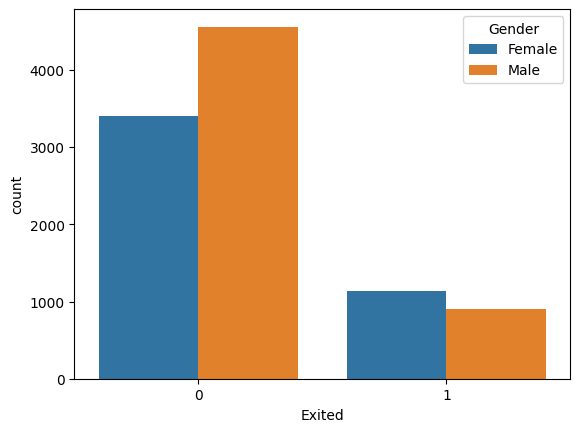

In [45]:
sns.countplot(x='Exited',hue='Gender',data=df)

**More females have left, while males have preferred to stay**

<Axes: xlabel='Exited', ylabel='count'>

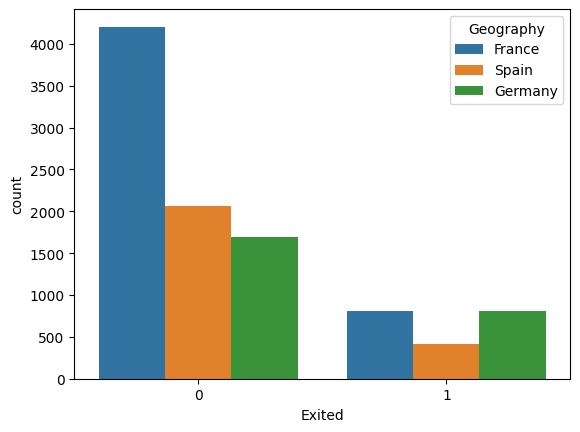

In [46]:
sns.countplot(x='Exited',hue='Geography',data=df)

<Axes: xlabel='Tenure', ylabel='Count'>

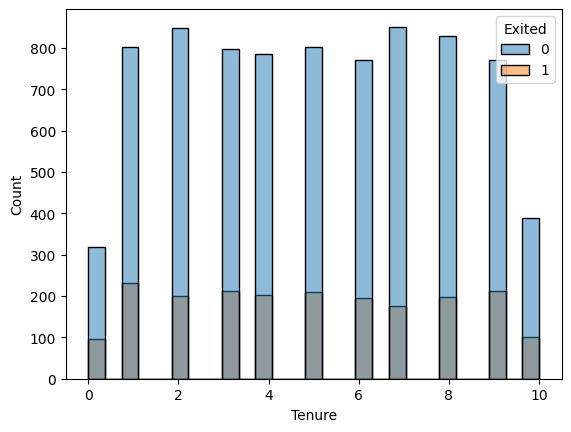

In [47]:
# df['Tenure'].plot(kind='hist')
sns.histplot(x='Tenure',hue='Exited',data=df)

**People who haven't exited have had a longer tenure**

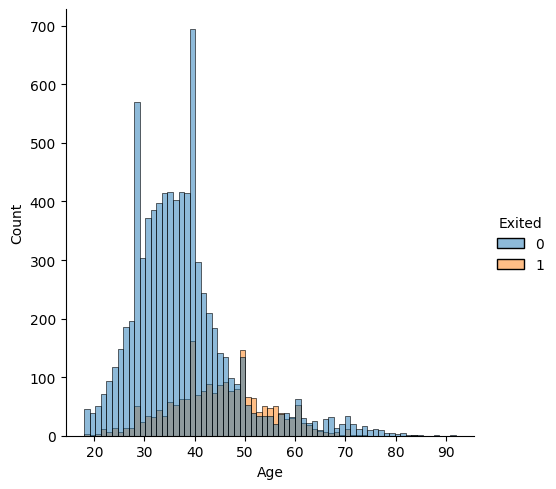

In [48]:
sns.displot(x='Age',hue='Exited',data=df)

**People in the age group of 35-55 have exited majorly, whereas people in the age group of 23-53 have stayed predominantly**

<Axes: xlabel='Exited', ylabel='count'>

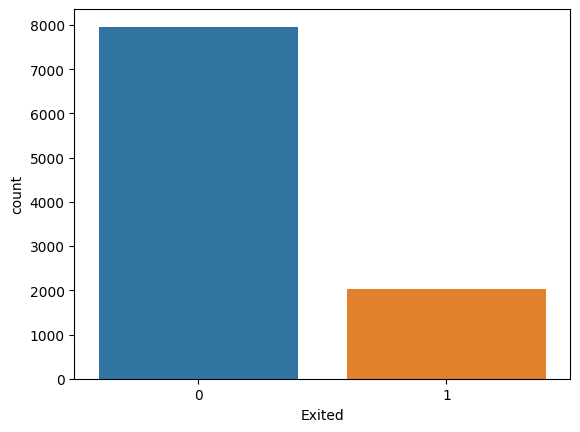

In [49]:
sns.countplot(x='Exited',data=df)

**Few people have exited in comparison to no of people that have stayed**

### Encoding the categorical features

In [ ]:
df.select_dtypes(include=['object'])

In [ ]:
df['Geography'].value_counts()

In [ ]:
df['Gender'].value_counts()

In [14]:
df_encoded = pd.get_dummies(df,columns=['Geography'])

In [15]:
df_encoded = pd.get_dummies(df_encoded,columns=['Gender'],drop_first=True)

In [ ]:
df_encoded

In [51]:
df_encoded[['Geography_France','Geography_Germany','Geography_Spain','Gender_Male']] = df_encoded[['Geography_France','Geography_Germany','Geography_Spain','Gender_Male']].astype(int)

In [ ]:
plt.figure(figsize=(12,5))
sns.heatmap(df_encoded.corr(),cmap='YlGnBu',annot=True)

**From the above plot we can infer that the target variable "Exited" has high positive correlation with the columns: ["Age","Geography_Germany","Balance"]**

**The target variable "Exited" has a negative correlation with the columns: ["IsActiveMember", "Gender_Male"]**


### Handling class imbalance

In [55]:
from imblearn.over_sampling import SMOTE

In [ ]:
df_encoded['Exited'].value_counts()

In [54]:
X = df_encoded.drop('Exited',axis=1)
y = df['Exited']

In [56]:
smote = SMOTE(sampling_strategy='auto',random_state=42)
X,y = smote.fit_resample(X,y)

In [ ]:
y.value_counts()

### Scaling

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X

### Train test split

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

## Data modelling, predictions and evaluation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Define a dictionary of models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Create an empty dictionary to store model evaluation results
results = {}

# Loop through the models, train, and evaluate them
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions
    model_score = model.score(X_test,y_test)  # Evaluate model performance
    results[model_name] = model_score  # Store results in the dictionary
    print(f'{model_name.upper()}: \nModel score = {model_score:.2f}')
    print("Confusion Matrix:")
    print(confusion_matrix(y_test,y_pred))
    print("Classification Report:")
    print(classification_report(y_test,y_pred))

**From the model evaluation, we can understand that the 2 best performing models are Random Forest Classifier and Gradient Boosting Classifier**